# HW 1

#### 1. Подготовка данных (5 б.)
1. Загрузите файл HW_StudentsPerformance.csv и проанализируйте на наличие пропусков, дубликатов и корректность типов данных (1 б.).
2. Выявите аномалии в данных и обработайте выбросы (можно заменить на медианное значение или моду, а можно если выбросов немного удалить их) (2 б.).
3. Постройте графики всех распределения признаков (1 б.).
4. Проверьте корреляции между признаками (1 б.).

2. Датасет Titanic (5 б.).
1. Просмотрите 10 первых, последних и произвольно выбранных строк датасета (результат должен быть различным/воспроизводимым при каждом запуске кода)(0.5 б.).
2. Какой средний и медианный возраст у пассажиров Титаника? Рассмотрите весь датасет и срезы по полу (0.5 б.).
3. Подсчитайте число пассажиров в возрасте до 25 лет включительно, число пассижиров в возрасте от 25 (не включительно) до 35 (включительно) лет  и чисо пассажиров старже 35 лет. Сравните полученные значения (0.5 б.).
4. Есть ли пассажиры с одинаковыми именами (0.5 б.)?
5. Какие есть аномалии в данных (посмотрите статистические характеристики)? Как можно объяснить найденные аномалии в данных? Обработайте эти аномалии (0.5 б.). 
6. Рассчитайте процент спасшихся пассажиров в каждой возрастной категории (границы категории определяете сами, в том числе можно посмотреть по каждому возрасту) и сохраните результаты в .csv файл (0.5 б.).
7. Выберите клиентов с различными значениями стоимости билета. Разделите на две категории по медианному значения Fare. Рассчитайте процент спасшихся пассажиров для категорий с высокой и низкой стоимостью билета. Сохраните результаты в .xlsx файл (0.5 б.).
8. Найдите число пассажиров в возрасте 22, 26 или 32 года и купивших билет стоимость от 30 до 300 £s (включительно) (0.5 б.).
9. В какой категории (Parents/Children Aboard = 0) или (Parents/Children Aboard = 1) больше всего спасшихся пассажиров (зависит ли ответ от пола и возраста) (1 б.).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузите файл HW_StudentsPerformance.csv и проанализируйте на наличие пропусков, дубликатов и корректность типов данных 

In [2]:
df=pd.read_csv('./StudentsPerformance_raw.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
pd.isnull(df).sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Выявите аномалии в данных и обработайте выбросы

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce8a577250>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce8a5778b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce8a557dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce8a577fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce8ac223a0>],
 'means': []}

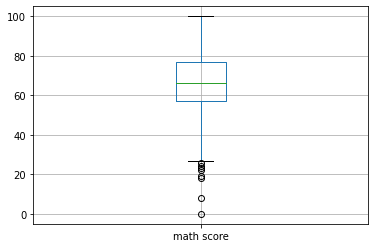

In [5]:
df.boxplot(column = 'math score', return_type = 'dict') #Обработка выбросов по math score

In [6]:
df.loc[df['math score'] < 28]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
91,male,group C,high school,free/reduced,none,27,34,36
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
363,female,group D,some high school,free/reduced,none,27,34,32
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [7]:
df.loc[df['math score'] < 28, 'math score'] = df['math score'].median()

In [8]:
df.loc[df['math score'] < 28]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


<AxesSubplot:>

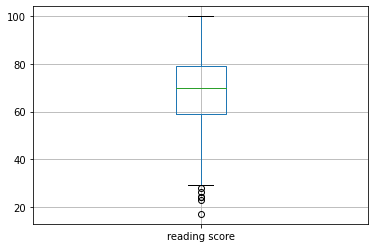

In [9]:
df.boxplot(column = 'reading score') #Обработка выбросов по reading score

In [10]:
df[df['reading score'] < 30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,66,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
601,female,group C,high school,standard,none,29,29,30
896,male,group B,high school,free/reduced,none,36,29,27
980,female,group B,high school,free/reduced,none,66,24,23


In [11]:
df.loc[df['reading score'] < 30, 'reading score'] = df['reading score'].median()

In [12]:
df[df['reading score'] < 30]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


<AxesSubplot:>

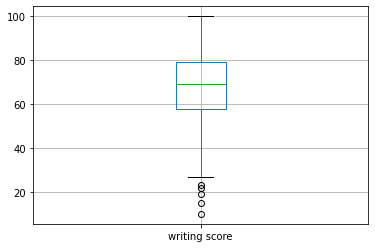

In [13]:
df.boxplot(column = 'writing score') #Обработка выбросов по writing score

In [14]:
df[df['writing score'] < 24]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,66,70,10
76,male,group E,some high school,standard,none,30,70,22
327,male,group A,some college,free/reduced,none,28,70,19
596,male,group B,high school,free/reduced,none,30,70,15
980,female,group B,high school,free/reduced,none,66,70,23


In [15]:
df = df.loc[df['writing score'] >= 24]

# Постройте графики всех распределения признаков 

In [16]:
agg_func = {'math score':['mean'], 'reading score':['mean'], 'writing score':['mean']}
df1 = pd.pivot_table(df, index =["parental level of education"])
df1

,math score,reading score,writing score
parental level of education,,,
associate's degree,68.063063,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,63.005155,65.546392,62.896907
master's degree,69.745763,75.372881,75.677966
some college,67.706667,69.853333,69.062222
some high school,64.774011,67.451977,65.440678


In [17]:
df_math = df1.loc[:,['math score']]
df_math

,math score
parental level of education,
associate's degree,68.063063
bachelor's degree,69.389831
high school,63.005155
master's degree,69.745763
some college,67.706667
some high school,64.774011


<AxesSubplot:xlabel='parental level of education'>

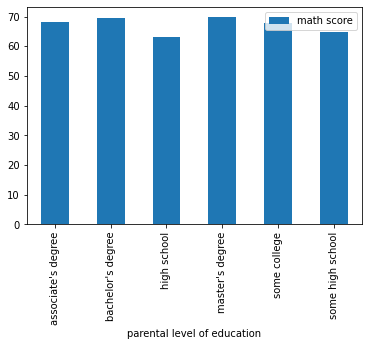

In [18]:
df_math.plot(kind="bar")

In [19]:
df_read = df1.loc[:,['reading score']]
df_read

,reading score
parental level of education,
associate's degree,70.927928
bachelor's degree,73.000000
high school,65.546392
master's degree,75.372881
some college,69.853333
some high school,67.451977


<AxesSubplot:xlabel='parental level of education'>

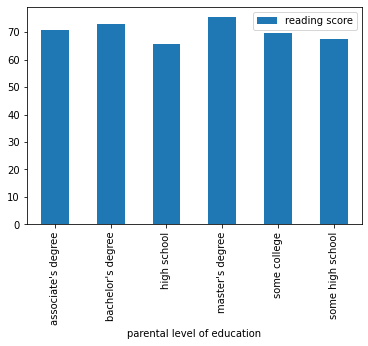

In [20]:
df_read.plot(kind="bar")

In [21]:
df2 = pd.pivot_table(df, index = ["gender"])
df2

,math score,reading score,writing score
gender,,,
female,64.451550,72.889535,72.684109
male,69.056367,65.903967,63.590814


<AxesSubplot:xlabel='gender'>

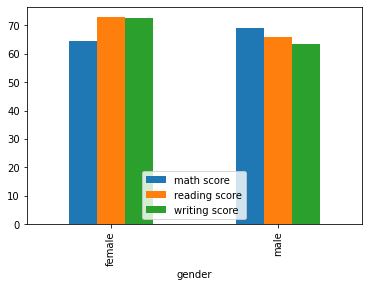

In [22]:
df2.plot(kind="bar")

In [23]:
df3 = pd.pivot_table(df, index = ["race/ethnicity"])
df3

,math score,reading score,writing score
race/ethnicity,,,
group A,62.011364,65.147727,63.170455
group B,64.882979,68.031915,66.095745
group C,64.927673,69.528302,68.009434
group D,67.664122,70.030534,70.145038
group E,74.136691,73.366906,71.762590


<AxesSubplot:xlabel='race/ethnicity'>

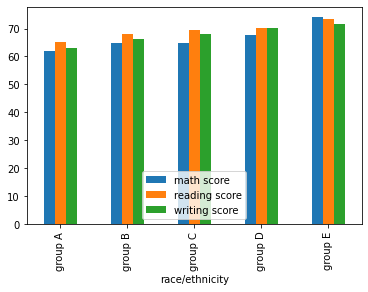

In [24]:
df3.plot(kind="bar")

# Проверьте корреляции между признаками

<AxesSubplot:>

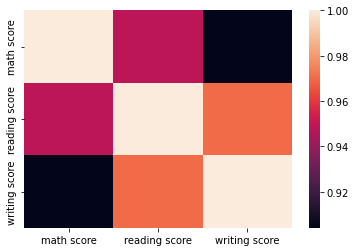

In [25]:
sns.heatmap(df3.corr())

# Титаник

# Просмотрите 10 первых, последних и произвольно выбранных строк датасета

In [34]:
df_titanic=pd.read_csv('./titanic.csv')
df_titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [35]:
df_titanic.tail(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
877,0,3,Mr. Johann Markun,male,33.0,0,0,7.8958
878,0,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167
879,0,2,Mr. Frederick James Banfield,male,28.0,0,0,10.5000
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.7500


In [36]:
df_titanic.loc[np.random.randint(886, size = 10)]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
652,0,2,Mr. Leonard Mark Hickman,male,24.0,2,0,73.5000
345,1,3,Mrs. Thomas Henry (Mary E Finck) Davison,female,34.0,1,0,16.1000
513,1,2,Mrs. (Amelia Milley) Lemore,female,34.0,0,0,10.5000
426,1,3,Mr. Berk (Berk Trembisky) Pickard,male,32.0,0,0,8.0500
288,1,1,Miss. Ellen Barber,female,26.0,0,0,78.8500
749,0,3,Mr. Lalio Jonkoff,male,23.0,0,0,7.8958
216,0,2,Mr. Sidney Samuel Jacobsohn,male,42.0,1,0,27.0000
259,1,3,Master. Edvin Rojj Felix Asplund,male,3.0,4,2,31.3875
118,0,3,Miss. Ellis Anna Maria Andersson,female,2.0,4,2,31.2750
877,0,3,Mr. Johann Markun,male,33.0,0,0,7.8958


# Какой средний и медианный возраст у пассажиров Титаника? Рассмотрите весь датасет и срезы по полу

In [37]:
df_titanic['Age'].mean()

29.471443066516347

In [38]:
df_titanic['Age'].median()

28.0

In [39]:
df_titanic_female = df_titanic[df_titanic['Sex'] == "female"]
df_titanic_female.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [40]:
df_titanic_female['Age'].mean()

27.719745222929937

In [41]:
df_titanic_female['Age'].median()

27.0

In [42]:
df_titanic_male = df_titanic[df_titanic['Sex'] == "male"]
df_titanic_male.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [43]:
df_titanic_male['Age'].mean()

30.431361256544506

In [44]:
df_titanic_male['Age'].median()

28.0

# Подсчитайте число пассажиров в возрасте до 25 лет включительно, число пассижиров в возрасте от 25 (не включительно) до 35 (включительно) лет и чисо пассажиров старже 35 лет.

In [45]:
df_titanic[df_titanic['Age'] <= 25].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,1,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
12,0,3,Mr. William Henry Saundercock,male,20.0,0,0,8.0500


In [46]:
df_titanic[df_titanic['Age'] <= 25].shape[0]

381

In [47]:
df_titanic[(df_titanic['Age'] > 25) & (df_titanic['Age'] <= 35)].shape[0]

244

In [48]:
df_titanic[df_titanic['Age'] > 35].shape[0]

262

Больше всего пассажиров на титанике моложе 25 лет

# Обработка дубликатов

In [49]:
Dup_Names = df_titanic[df_titanic['Name'].duplicated()]
Dup_Names.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


Нет пассажиров с одинаковыми именами

# Рассчитайте процент спасшихся пассажиров в каждой возрастной категории (границы категории определяете сами, в том числе можно посмотреть по каждому возрасту) и сохраните результаты в .csv файл

In [50]:
df_titanic_young = df_titanic[df_titanic['Age'] <=20]
a1 = df_titanic_young[df_titanic_young['Survived'] == 1].shape[0] / df_titanic_young.shape[0] * 100
a1

41.891891891891895

In [51]:
df_titanic_middleaged = df_titanic[(df_titanic['Age'] > 20)&(df_titanic['Age'] <= 45)]
a2 = df_titanic_middleaged[df_titanic_middleaged['Survived'] == 1].shape[0] / df_titanic_middleaged.shape[0] * 100
a2

37.61467889908257

In [52]:
df_titanic_adult = df_titanic[df_titanic['Age'] > 45]
a3 = df_titanic_adult[df_titanic_adult['Survived'] == 1].shape[0] / df_titanic_adult.shape[0] * 100
a3

36.666666666666664

In [53]:
df_age_surv = pd.DataFrame(
    {
        "Category" : ["Young (<= 20)", "Middle aged (> 20  and <= 45)", "Adult (> 45)"],
        "Survived %" : [ a1, a2, a3],
    }
)
df_age_surv

,Category,Survived %
0,Young (<= 20),41.891892
1,Middle aged (> 20 and <= 45),37.614679
2,Adult (> 45),36.666667


In [54]:
df_age_surv.to_csv('Survived_Ages.csv')

# Выберите клиентов с различными значениями стоимости билета. Разделите на две категории по медианному значения Fare. Рассчитайте процент спасшихся пассажиров для категорий с высокой и низкой стоимостью билета. Сохраните результаты в .xlsx файл

In [55]:
Dup_Fare = df_titanic.drop_duplicates(subset = 'Fare', keep = 'first')
Dup_Fare.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [56]:
Dup_Fare_low = Dup_Fare[Dup_Fare['Fare'] <= Dup_Fare['Fare'].median()]
Dup_Fare_low

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
...,...,...,...,...,...,...,...,...
856,0,3,Mr. Claus Peter Hansen,male,41.0,2,0,14.1083
862,1,2,Miss. Asuncion Duran y More,female,27.0,1,0,13.8583
868,0,1,Mr. Frans Olof Carlsson,male,33.0,0,0,5.0000
872,0,3,Mr. Alfred Ossian Gustafsson,male,20.0,0,0,9.8458


In [57]:
Dup_Fare_high = Dup_Fare[Dup_Fare['Fare'] > Dup_Fare['Fare'].median()]
Dup_Fare_high

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
...,...,...,...,...,...,...,...,...
779,0,3,Mr. Andrew G Johnston,male,35.0,1,2,23.4500
792,1,1,Dr. Alice (Farnham) Leader,female,49.0,0,0,25.9292
813,0,2,Mr. Albert Mallet,male,31.0,1,1,37.0042
849,1,1,Miss. Mary Conover Lines,female,16.0,0,1,39.4000


In [58]:
Dup_Fare_low[Dup_Fare_low['Survived'] == 1].shape[0] / Dup_Fare_low.shape[0] * 100

35.483870967741936

In [59]:
Dup_Fare_high[Dup_Fare_high['Survived'] == 1].shape[0] / Dup_Fare_high.shape[0] * 100

57.25806451612904

In [60]:
res = pd.DataFrame(
    {
        "Group": ["Low Fare", "High Fare"],
        "Survived %" : [Dup_Fare_low[Dup_Fare_low['Survived'] == 1].shape[0] / Dup_Fare_low.shape[0] * 100, Dup_Fare_high[Dup_Fare_high['Survived'] == 1].shape[0] / Dup_Fare_high.shape[0] * 100],
    }
)
res

,Group,Survived %
0,Low Fare,35.483871
1,High Fare,57.258065


In [61]:
salary_sheets = {'Low Fare': Dup_Fare_low, 'High Fare': Dup_Fare_high, 'Percebt of Survived': res}
writer = pd.ExcelWriter('./Age_Categories.xlsx', engine='xlsxwriter')

for sheet_name in salary_sheets.keys():
    salary_sheets[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)

writer.save()

In [62]:
df_titanic[((df_titanic['Age'] == 22) & ((df_titanic['Fare'] >= 30) & (df_titanic['Fare'] <= 300)))]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
150,1,1,Mrs. Thomas (Edith Wearne) Pears,female,22.0,1,0,66.6000
354,1,1,Miss. Elsie Edith Bowerman,female,22.0,0,1,55.0000
371,0,1,Mr. Sante Ringhini,male,22.0,0,0,135.6333
536,1,1,Miss. Hedwig Margaritha Frolicher,female,22.0,0,2,49.5000
605,1,2,Mrs. Joseph (Juliette Marie Louise Lafargue) L...,female,22.0,1,2,41.5792
705,1,1,Miss. Alice Cleaver,female,22.0,0,0,151.5500


In [63]:
df_titanic[((df_titanic['Age'] == 26) & ((df_titanic['Fare'] >= 30) & (df_titanic['Fare'] <= 300)))]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
288,1,1,Miss. Ellen Barber,female,26.0,0,0,78.8500
506,1,3,Mr. Fang Lang,male,26.0,0,0,56.4958
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [64]:
df_titanic[((df_titanic['Age'] == 32) & ((df_titanic['Fare'] >= 30) & (df_titanic['Fare'] <= 300)))]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
73,1,3,Mr. Lee Bing,male,32.0,0,0,56.4958
217,1,1,Miss. Albina Bazzani,female,32.0,0,0,76.2917
629,1,1,Dr. Max Stahelin-Maeglin,male,32.0,0,0,30.5000
640,1,3,Mr. Choong Foo,male,32.0,0,0,56.4958
662,0,2,Mr. Lewis Hickman,male,32.0,2,0,73.5000
834,1,3,Mr. Chang Chip,male,32.0,0,0,56.4958
